In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


### Поговорим немного о распределениях 

**Пример 1**.

У нас есть игральный кубик - 6 граней с числаси от 1 до 6.

Какие вероятности выпадения каждой из возможных граней?

P(1) = 1/6

P(2) = 1/6

P(3) = 1/6

P(4) = 1/6

P(5) = 1/6

P(6) = 1/6

Это - **теоретическое распределение** исходов игрального кубика - в теории, если много раз подбрасывать игральный кубик и посчитать практические вероятности их выпадения, то они должны быть близки по значениям к теоретическому распределению.

Такое распределение называют **равномерным** - вероятности всех исходов равны между собой

Какие еще примеры равномерного распределения можно встретить?

(array([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.]),
 array([1.        , 1.45454545, 1.90909091, 2.36363636, 2.81818182,
        3.27272727, 3.72727273, 4.18181818, 4.63636364, 5.09090909,
        5.54545455, 6.        ]),
 <BarContainer object of 11 artists>)

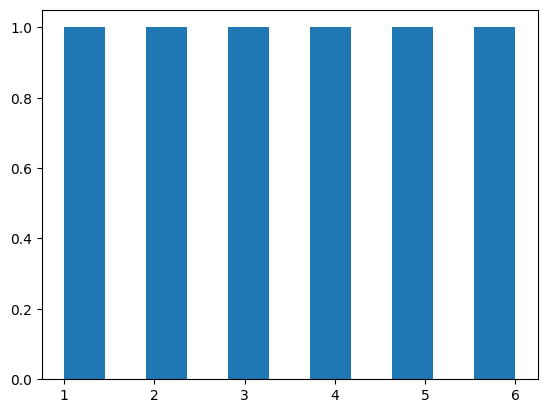

In [2]:
### вот так это выглядит графически - для наглядной демонстрации распределений используют гистограммы

theoretical_variants = np.array([1, 2, 3, 4, 5, 6])
plt.hist(theoretical_variants, bins=11)

Мы упомянули, что чем больше у нас испытаний в выборке, тем больше гистограмма этой выборки будет похожа на теоретическую. Давайте наглядно это продемонстрируем

(array([2., 0., 3., 0., 4., 0., 3., 0., 5., 0., 3.]),
 array([1.        , 1.45454545, 1.90909091, 2.36363636, 2.81818182,
        3.27272727, 3.72727273, 4.18181818, 4.63636364, 5.09090909,
        5.54545455, 6.        ]),
 <BarContainer object of 11 artists>)

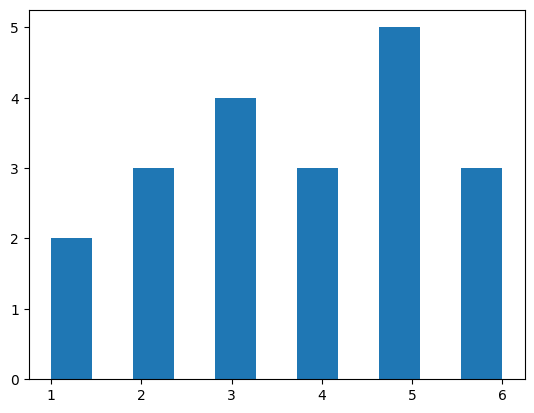

In [3]:
### подбрасываем кубик 20 раз. Как видим - у нас получается лишь общие очертания равномерного распределения
n = 20

results = []
for i in range(n):
    ### функция randint возвращает число из равномерного распределения от low (в нашем случае 1) до (high-1) (в нашем случае 6)
    result = np.random.randint(1, 7)
    results.append(result)
    
plt.hist(results, 11)

(array([36.,  0., 44.,  0., 41.,  0., 43.,  0., 44.,  0., 42.]),
 array([1.        , 1.45454545, 1.90909091, 2.36363636, 2.81818182,
        3.27272727, 3.72727273, 4.18181818, 4.63636364, 5.09090909,
        5.54545455, 6.        ]),
 <BarContainer object of 11 artists>)

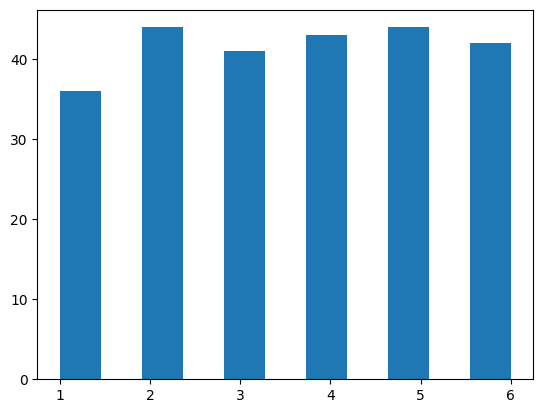

In [4]:
### подбрасываем кубик 500 раз. Уже лучше - распределение становится похожим на 
n = 250

results = []
for i in range(n):
    result = np.random.randint(1, 7)
    results.append(result)
    
plt.hist(results, 11)

(array([1683.,    0., 1657.,    0., 1665.,    0., 1650.,    0., 1623.,
           0., 1722.]),
 array([1.        , 1.45454545, 1.90909091, 2.36363636, 2.81818182,
        3.27272727, 3.72727273, 4.18181818, 4.63636364, 5.09090909,
        5.54545455, 6.        ]),
 <BarContainer object of 11 artists>)

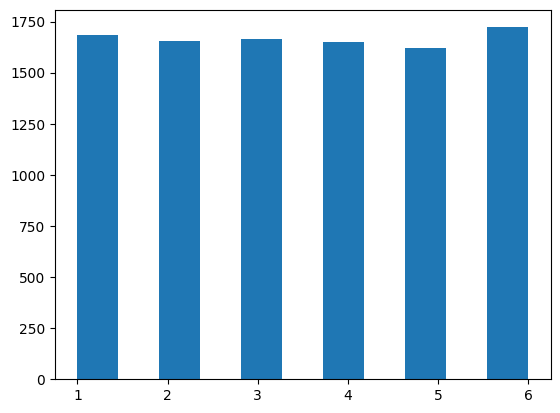

In [5]:
### подбрасываем кубик 10000 раз. Здесь распределение выборки выглядит и вовсе практически идеально равномерным
n = 10000

results = []
for i in range(n):
    result = np.random.randint(1, 7)
    results.append(result)
    
plt.hist(results, 11)

Это наблюдение очень важно - оно отражает **закон больших чисел**. Мы не будем вникать в его математическую составляющую, а отметим основной смысл - чем больше наша выборка из некоторого закона распределения, тем более похоже распределение выборки на теоретическое распределение

В том числе и поэтому в анализе данных очень важно, чтобы было как можно больше данных

К примеру - предположим у нас было бы только 25 наблюдений признака . Как мы видели из гистограммы выше, распределение этой выборки не очень то было похоже на теоретическое равномерное. В такой ситуации нам тяжело сказать, дейтсвительно ли наша выборка была получена из равномерного распределения - вдруг, кубик был очень кривой, и какие-то грани даже теоретически будут выпадать чаще остальных?

А вот когда у нас было 10000 наблюдений, то стало сразу понятно - выборка из равномерного распределения

# Нормальное распределение

Давайте обсудим еще одно распределение, которое является очень важным и с которы часто приходится иметь дело - оно называется **нормальным**

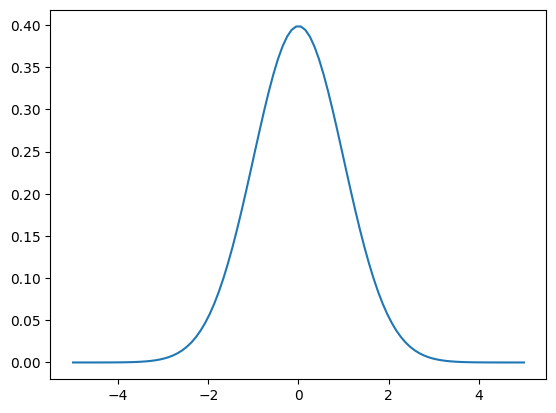

In [6]:
### вид теоретического нормального распределения
mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(-5, 5, 100)
plt.plot(x,sts.norm.pdf(x, mu, sigma))
plt.show()

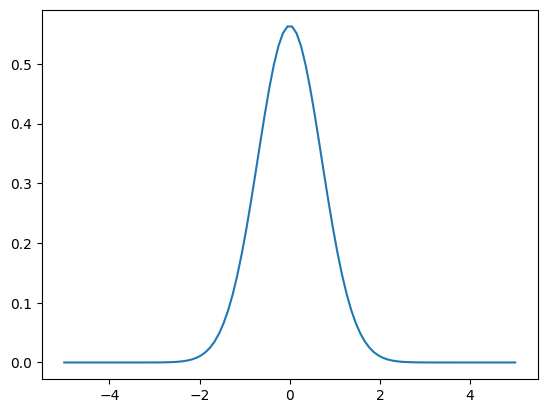

In [7]:
mu = 0
variance = 0.5
sigma = np.sqrt(variance)
x = np.linspace(-5, 5, 100)
plt.plot(x,sts.norm.pdf(x, mu, sigma))
plt.show()

Как видно, для нормального распределения характерен пик, от которого плавно 

Любое нормальное распределение можно описать двумя числами - это его математическим ожидание и стандартным отклонением

Математическое ожидание - пик на графике, в данном случае 0.

Стандартное отклонение - то, насколько широко или узко расползается наш график

Основной смысл стандартного отклонения - то, что в пределах 3 стандартных отклонений от математического ожидания находится 99% наблюдений

(array([  2.,   2.,   6.,  20.,  16.,  37.,  57.,  93., 102., 113., 130.,
        123., 112.,  78.,  43.,  28.,  19.,  11.,   6.,   2.]),
 array([152.11276641, 154.33096474, 156.54916306, 158.76736139,
        160.98555972, 163.20375805, 165.42195637, 167.6401547 ,
        169.85835303, 172.07655136, 174.29474969, 176.51294801,
        178.73114634, 180.94934467, 183.167543  , 185.38574132,
        187.60393965, 189.82213798, 192.04033631, 194.25853463,
        196.47673296]),
 <BarContainer object of 20 artists>)

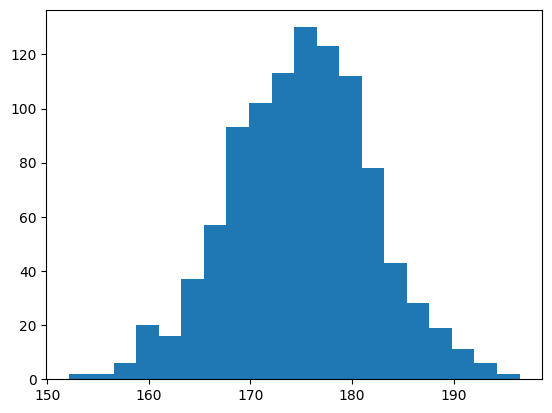

In [8]:
### функция normal генерирует 1000 примеров из нормального распределения с математическим ожиданием 175 и
### и стандартным отклонением 7

massive = np.random.normal(175, 7, 1000)
plt.hist(massive, bins=20)

Попробуем посчитать выборочные математическое ожидание и дисперсию - очень похоже с теоретическими значениями

In [9]:
E_ = np.mean(massive)
STD_ = np.std(massive)

print('Математическое ожидание: ', E_)
print('Стандартное отклонение: ', STD_)

Математическое ожидание:  174.9887293256463
Стандартное отклонение:  6.91609320175109


Найдем значения, которые не попадают в пределы 3 стандартных отклонений

In [10]:
### 
left_value = E_ - 3 * STD_
right_value = E_ + 3 * STD_

for value in massive:
    if (value < left_value) or (value > right_value):
        print (value)

153.44323600890516
196.47673296138115
152.11276640918106


Такие значения называют **выбросами**. Что с ними делать и почему они важны - будем обсуждать в течение курса

А пока - еще gример нормального распределения

(array([  2.,   0.,   1.,   1.,   2.,   3.,   9.,   8.,  12.,  17.,  25.,
         41.,  56.,  77.,  90., 104., 147., 131., 208., 195., 234., 265.,
        285., 294., 280., 318., 287., 282., 263., 214., 208., 189., 155.,
        152., 110.,  78.,  70.,  63.,  36.,  27.,  12.,  13.,  14.,   8.,
          2.,   4.,   2.,   2.,   2.,   2.]),
 array([ 4.71059499,  4.92125385,  5.13191272,  5.34257158,  5.55323044,
         5.7638893 ,  5.97454817,  6.18520703,  6.39586589,  6.60652476,
         6.81718362,  7.02784248,  7.23850135,  7.44916021,  7.65981907,
         7.87047793,  8.0811368 ,  8.29179566,  8.50245452,  8.71311339,
         8.92377225,  9.13443111,  9.34508997,  9.55574884,  9.7664077 ,
         9.97706656, 10.18772543, 10.39838429, 10.60904315, 10.81970202,
        11.03036088, 11.24101974, 11.4516786 , 11.66233747, 11.87299633,
        12.08365519, 12.29431406, 12.50497292, 12.71563178, 12.92629064,
        13.13694951, 13.34760837, 13.55826723, 13.7689261 , 13.97958496,
 

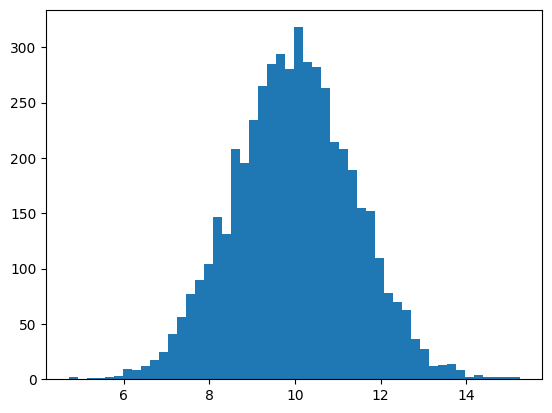

In [11]:
### длина стебеля. Математическое ожидание - 10 см, стандартное отклонение 1.4 см

massive = np.random.normal(10, 1.4, 5000)
plt.hist(massive, bins=50)

Бывают и другие виды типичных распределений вероятности - о них мы будем говорить в ходе курса